**张量切片**

选择张量的特定切片叫张量切片

<function matplotlib.pyplot.show(*args, **kw)>

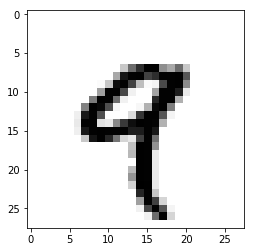

In [12]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
#选择train_images中的第5张图片并显示出来
digit_5=train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit_4,cmap=plt.cm.binary)
plt.show

In [4]:
list_0=train_images[0:3]#choose 3 pics and print
list_0.shape

(3, 28, 28)

数据张量的第一个轴（0轴）一般都是样本轴（samples axis），即多少个样本（图片），这里是Index为0，1，2的三个samples

深度学习一般是分批量训练的（batch）因此一个batch的第一个轴也叫做批量轴（batch axis）


下面定义逐元素的运算（element-wise operation)

In [10]:
#对于矩阵（2D张量），形状为（rows，columns），也是（samples，features）
#对于3D张量，如时间序列数据或序列数据，形状为（samples，timesteps，features）
#image是4D张量，形状（samples，height，width，channels）
#video是5D张量，形状（samples，frames，height，width，channels）
#最常见的数据存在matix里面，第一个轴是样本轴，第二个轴是feature轴，比如记录1000个人的年龄性别收入的2D张量形状为（1000，3）
#下面定义一下relu的公式（求参数x与0哪个更大并保留较大的那个）
def naive_relu(x):
    assert len(x.shape)==2 #检查x是否是一个2D张量，如果不是马上返回error
    x=x.copy()#复制出一个x以免之后的计算覆盖掉x本身的值
    for i in range(x.shape[0]):#对x的sample轴做迭代（第一个轴）
        for j in range(x.shape[1]):
            x[i,j]=max(x[i,j],0)
    return x

In [12]:
#两个形状相同的张量逐元素相加
def naive_add(x,y):
    assert len(x.shape)==2
    assert x.shape==y.shape
    x=x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j]+=y[i,j]
    return x

In [15]:
#实际上在numpy里面内置了逐元素的加法和类似relu的运算，如下
""""
z=x+y
z=np.maximum(z,0)
"""""

'"\nz=x+y\nz=np.maximum(z,0)\n'

逐元素的加法仅支持形状相同的两个张量相加，但是如果我们在运算中将两个形状不同的张量相加，那么ndim较小的张量会被广播，以获得和ndim较大的张量相同的shape，再进行逐元素操作。

1.首先为ndim小的张量增加轴，直到ndim与较大的张量一样大；

2.较小的张量沿着新轴重复，使其形状与较大的张量相同。

比如一个2D张量x，shape为（32，10），另一个1D张量y，形状为（10，）（y只有一个轴，逗号是用元组tuple存数字时自带的）；

首先给y增加一个新的空轴，y.shape=(1,10),（此时len（y.shape）==2，y成为一个2D张量），然后将y沿着新轴重复32次，和x的形状一致。

for i in range(0,32):
   Y[i,:]=y
   
当然y的广播过程没有真的发生在内存中，虽然在计算时操作的结果和这种思维模型的结果一致（见下方def）

prerequisite：(倒数几个轴要完全相同才能通过广播补齐再相加）

ndim较大的张量形状是（a,b,c......n,n+1,....m)

ndim较小的张量形状是（n,n+1,....m)

则系统会自动填充（a,...n-1)之间的轴

In [18]:
def naive_add_marix_and_vector(x,y):
    assert len(x.shape)==2
    assert len(y.shape)==1
    assert x.shape[1]==y.shape[0]#他俩能相加的先决条件是倒数几个轴shape都一样
    
    x=x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j]=x[i,j]+y[j]
    return x

In [19]:
x=np.random.random((64,3,32,10))#用np随机生成shape是这样的张量
y=np.random.random((32,10))
z=np.maximum(x,y)
z.shape

(64, 3, 32, 10)

张量点积（tensor product）

✳️代表的是逐元乘积

在numpy和keras里，都是用dot来代表点积的

In [22]:
a=np.array([[1,2],[3,4]])
b=np.array([[2,2],[2,2]])
a*b

array([[2, 4],
       [6, 8]])

In [25]:
c=np.array([[1,2],[3,4]])
np.dot(a,c)

array([[ 7, 10],
       [15, 22]])

In [47]:
#dot(x,y)实际上的内置函数
def naive_vector_dot(x,y):
    assert len(x.shape)==1
    assert len(y.shape)==1#ensure x and y are vectors
    z=0
    for i in range(x.shape[0]):#vector不存在转置的问题，记录其shape的tuple只有一个轴，是第一个（0轴）
        z=z+x[i]*y[i]
    print(z)

In [48]:
a=b=np.array([1,2])
naive_vector_dot(a,b)

5


In [35]:
x=np.array([[1,2,3,4],[5,5,6,7]])
x.shape

(2, 4)

In [36]:
x.T

array([[1, 5],
       [2, 5],
       [3, 6],
       [4, 7]])

In [37]:
#vector无法转置
a=np.array([1,2,3])
a.T

array([1, 2, 3])

In [54]:
def naive_vector_dot(x,y):
    assert len(x.shape)==1
    assert len(y.shape)==1
    z=0
    for i in range(x.shape[0]):
        z=z+x[i]*y[i]
    return z

In [55]:
def naive_matrix_vector_dot(x,y):
    assert len(x.shape)==2
    assert len(y.shape)==1
    assert x.shape[1]==y.shape[0]
    z=np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i]=naive_vector_dot(x[i,:],y)
    return z

In [56]:
a=np.array([1,2])
b=np.array([3,4])
c=np.array([[1,2],[3,4]])
naive_vector_dot(a,b)
naive_matrix_vector_dot(c,b)

array([11., 25.])